In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

In [3]:
#データセット取得
df0_1 = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset0_1.csv")
df0_2 = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset0_2.csv")
df0_3 = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset0_3.csv")
df__1 = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset18.csv")

#それぞれのカラム名の指定
df0_1.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","X","y"]
df0_2.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","X","y"]
df0_3.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","X","y"]
df__1.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","X","y"]

In [63]:
df__1.UUIDs.unique()

array(['a0000000aaaa41441111110000000000',
       '20000000aaaa41441111110000000000',
       '60000000aaaa41441111110000000000',
       '70000000aaaa41441111110000000000',
       '90000000aaaa41441111110000000000',
       '30000000aaaa41441111110000000000',
       '1000000007ae1001b000001c4d8dffff',
       '10000000aaaa41441111110000000000',
       '40000000aaaa41441111110000000000',
       '80000000aaaa41441111110000000000'], dtype=object)

シートなしの場合
RSSIのデータ数:6833
RSSIの平均値:-73.55202692814284
RSSIの分散値:3.030141188883296

後ろの壁にシートを貼った場合
RSSIのデータ数:7665
RSSIの平均値:-73.4992824527071
RSSIの分散値:2.447151374640378

シートで前以外を囲った場合
RSSIのデータ数:7415
RSSIの平均値:-76.16547538772758
RSSIの分散値:3.024224685319774



(-100, -60)

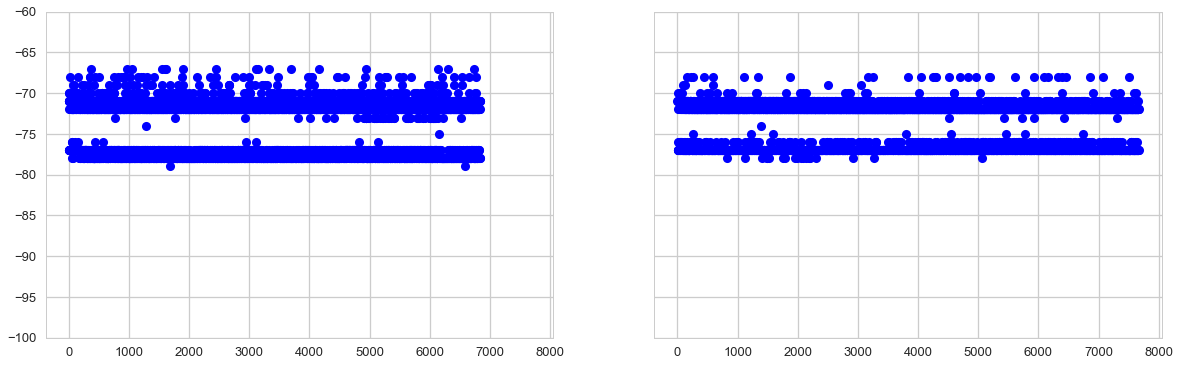

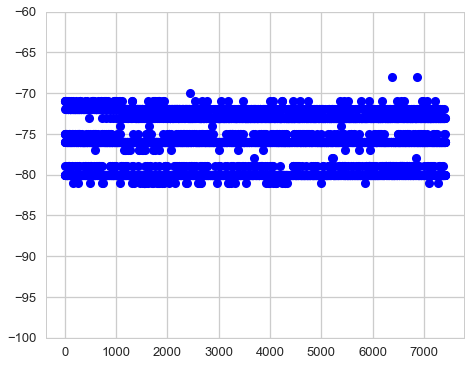

In [29]:
print("シートなしの場合")
print("RSSIのデータ数:%s" % df0_1.RSSI.count())
print("RSSIの平均値:%s" % df0_1.RSSI.mean())
print("RSSIの分散値:%s\n" % df0_1.RSSI.std())

print("後ろの壁にシートを貼った場合")
print("RSSIのデータ数:%s" % df0_2.RSSI.count())
print("RSSIの平均値:%s" % df0_2.RSSI.mean())
print("RSSIの分散値:%s\n" % df0_2.RSSI.std())

print("シートで前以外を囲った場合")
print("RSSIのデータ数:%s" % df0_3.RSSI.count())
print("RSSIの平均値:%s" % df0_3.RSSI.mean())
print("RSSIの分散値:%s\n" % df0_3.RSSI.std())

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,6), sharex=True,  sharey=True)
fig, (ax3) = plt.subplots(ncols=1,figsize=(7.5,6))

ax1.plot(df0_1.index,df0_1.RSSI,"bo")
#ax1.set_xlim([0,100])
ax1.set_ylim([-100,-60])

ax2.plot(df0_2.index,df0_2.RSSI,"bo")

ax3.plot(df0_3.index,df0_3.RSSI,"bo")
#ax3.set_xlim([0,100])
ax3.set_ylim([-100,-60])

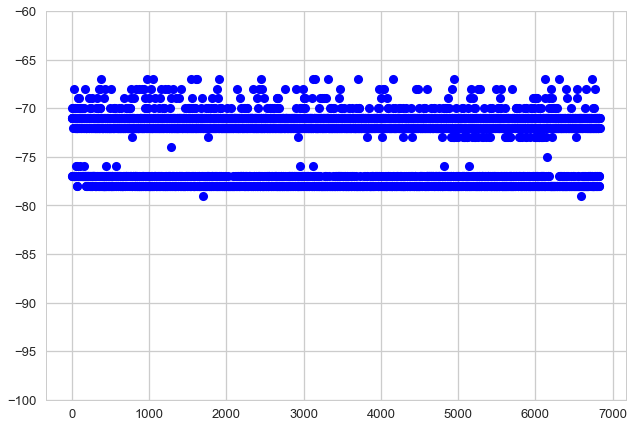

In [6]:
plt.plot(df0_1.index,df0_1.RSSI,"bo")
plt.ylim([-100,-60])
plt.savefig("reflect1.png")

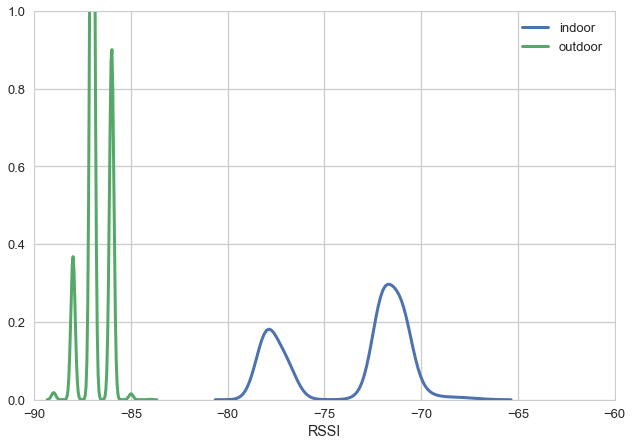

In [23]:
sns.distplot(df0_1.RSSI,hist=False,kde_kws={"label": "indoor"})
sns.distplot(df_out.RSSI,hist=False,kde_kws={"label": "outdoor"})
plt.xlim([-90,-60])
plt.ylim([0,1.0])
plt.savefig("reflect0.png")

In [17]:
df0_1.RSSI.std()

3.030141188883296

### 屋外計測

In [9]:
#データセット取得
df_out = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset_out.csv")

#それぞれのカラム名を指定
df_out.columns =  ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","X","y"]

In [10]:
df_out = df_out[df_out.UUIDs == '285344424c45414480c0280000000000']
df_out = df_out.reset_index(drop=True)

In [11]:
df_out = df_out[2000:df_out.RSSI.count() - 1000]

屋外で計測した場合
RSSIのデータ数:6779
RSSIの平均値:-86.84820770025077
RSSIの分散値:0.6132217985880037



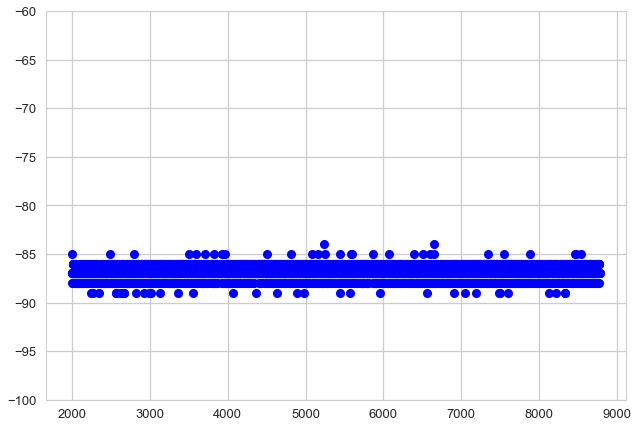

In [24]:
print("屋外で計測した場合")
print("RSSIのデータ数:%s" % df_out.RSSI.count())
print("RSSIの平均値:%s" % df_out.RSSI.mean())
print("RSSIの分散値:%s\n" % df_out.RSSI.std())

ax4 = plt.subplot()
ax4.plot(df_out.index,df_out.RSSI,"bo")
#ax4.set_xlim([2000,2100])
ax4.set_ylim([-100,-60])
plt.savefig("reflect2.png")

(-90, -60)

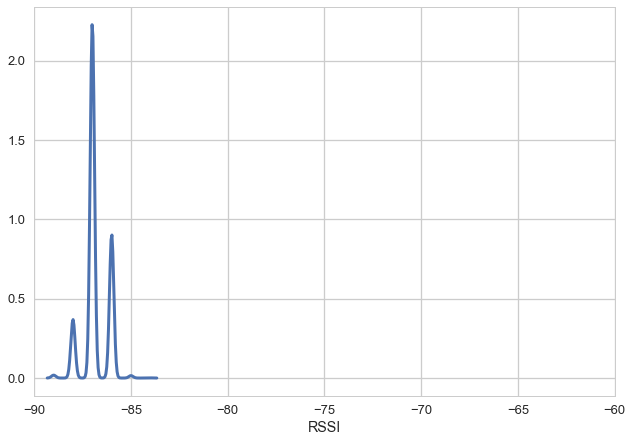

In [15]:
sns.distplot(df_out.RSSI,hist=False)
plt.xlim([-90,-60])

In [18]:
df_out.RSSI.std()

0.6132217985880037